In [1]:
# http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

In [8]:
# Part 3
import warnings
warnings.filterwarnings("ignore")

In [37]:
import os
import sys

import pandas as pd
#import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [ ]:
# read the data

In [11]:
spy = pd.read_csv('SPY.csv', parse_dates = ['Date'])
spy = spy[['Date', 'Close']]
spy.columns = ['Date', 'SPY']
spy = spy.set_index('Date')
spy.head()

,SPY
Date,
2007-01-03,141.369995
2007-01-04,141.669998
2007-01-05,140.539993
2007-01-08,141.190002
2007-01-09,141.070007


In [12]:
msft = pd.read_csv('MSFT.csv', parse_dates = ['Date'])


In [13]:
msft = msft[['Date', 'Close']]

In [14]:
msft.columns = ['Date', 'MSFT']


In [15]:
msft = msft.set_index('Date')
msft.head()

,MSFT
Date,
2007-01-03,29.860001
2007-01-04,29.809999
2007-01-05,29.639999
2007-01-08,29.930000
2007-01-09,29.959999


In [16]:
tlt = pd.read_csv('TLT.csv', parse_dates = ['Date'])
tlt = tlt[['Date', 'Close']]
tlt.columns = ['Date', 'TLT']
tlt = tlt.set_index('Date')
tlt.head()

,TLT
Date,
2007-01-03,89.059998
2007-01-04,89.599998
2007-01-05,89.209999
2007-01-08,89.370003
2007-01-09,89.370003


In [17]:
# combine data
data = spy.join(msft, how = 'inner').join(tlt, how = 'inner')

In [18]:
data.head()

,SPY,MSFT,TLT
Date,,,
2007-01-03,141.369995,29.860001,89.059998
2007-01-04,141.669998,29.809999,89.599998
2007-01-05,140.539993,29.639999,89.209999
2007-01-08,141.190002,29.930000,89.370003
2007-01-09,141.070007,29.959999,89.370003


In [19]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [22]:
# log returns
lrets = np.log(data/data.shift(1)).dropna()

In [24]:
# Autoregressive Conditionally Heteroskedastic Models - ARCH(p) 

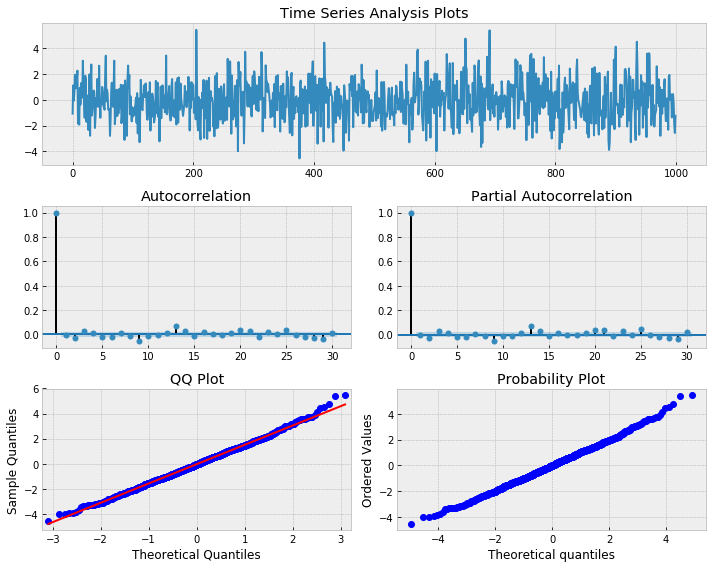

In [25]:
# Simulate ARCH(1) series
# Var(yt) = a_0 + a_1*y{t-1}**2
# if a_1 is between 0 and 1 then yt is white noise

np.random.seed(13)

a0 = 2
a1 = .5

y = w = np.random.normal(size=1000)
Y = np.empty_like(y)

for t in range(len(y)):
    Y[t] = w[t] * np.sqrt((a0 + a1*y[t-1]**2))

# simulated ARCH(1) series, looks like white noise
tsplot(Y, lags=30)

In [26]:
# Generalized Autoregressive Conditionally Heteroskedastic Models - GARCH(p,q) 

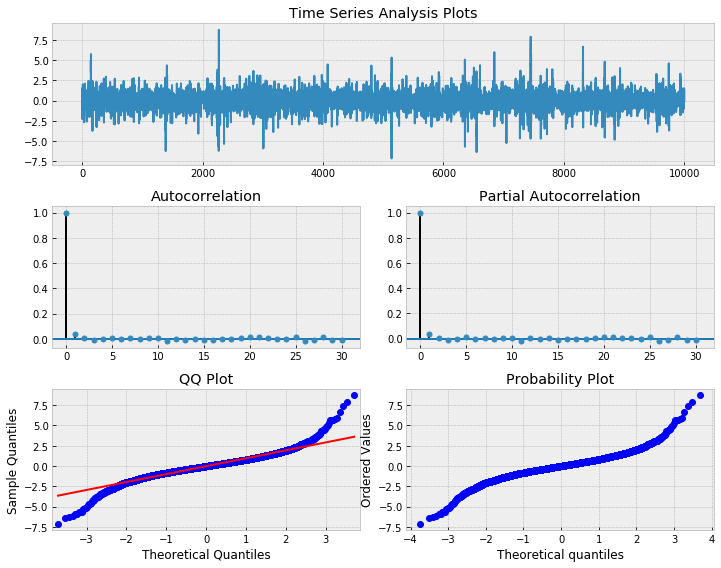

In [36]:
# Simulating a GARCH(1, 1) process

np.random.seed(2)

a0 = 0.2
a1 = 0.5
b1 = 0.3

n = 10000
w = np.random.normal(size=n)
eps = np.zeros_like(w)
sigsq = np.zeros_like(w)

for i in range(1, n):
    sigsq[i] = a0 + a1*(eps[i-1]**2) + b1*sigsq[i-1]
    eps[i] = w[i] * np.sqrt(sigsq[i])

_ = tsplot(eps, lags=30)

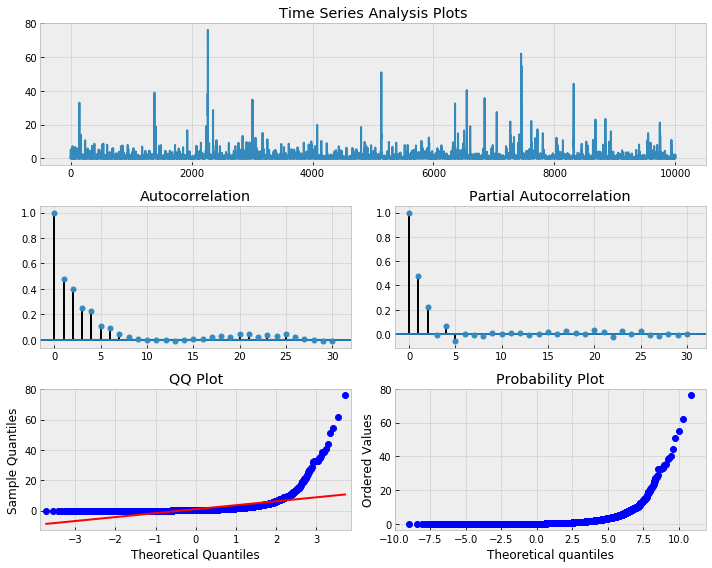

In [28]:
_ = tsplot(np.square(eps), lags=30)

In [32]:
# Fit a GARCH(1, 1) model to our simulated EPS series
# We use the arch_model function from the ARCH package

am = arch_model(eps)
res = am.fit(update_freq=5)
print(res.summary())

NameError: name 'arch_model' is not defined

In [ ]:
# http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016